<div align="center">
  <img src="img/car.png" />
  <h1><b>Car acceptability evaluation</b></h1>
  <hr/>
</div>

> [Dataset source](https://archive.ics.uci.edu/dataset/19/car+evaluation)

In [82]:
import pandas as pd

df = pd.read_csv('data/car_evaluation.csv', header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## **1. Data exploration/wrangling/cleansing**
<hr/>

### **1.1 Columns**

The dataset has the following columns. These columns will need to be given a name first:
- Buying price
- Maintenance costs
- Number of doors
- Number of persons the car fits
- Size of the luggage compartment
- Estimated safety of the car
- **Car acceptability verdict (Target)**

In [83]:
# Give each column a name
df.columns = ['buying_price', 'maintenance_price', 'num_doors', 'num_persons', 'lugg_size', 'safety', 'acceptability']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying_price       1728 non-null   object
 1   maintenance_price  1728 non-null   object
 2   num_doors          1728 non-null   object
 3   num_persons        1728 non-null   object
 4   lugg_size          1728 non-null   object
 5   safety             1728 non-null   object
 6   acceptability      1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


> We can see that each column now has a name and there is no missing values in the columns (1728 entries for each column for a total of 1728 rows)

### **1.2 Data distribution**
Lets see if the data is well distributed across all columns.

In [84]:
# Print the value counts for each column
for col in df.columns:
    print(df[col].value_counts())

buying_price
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maintenance_price
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
num_doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
num_persons
2       576
4       576
more    576
Name: count, dtype: int64
lugg_size
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
acceptability
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


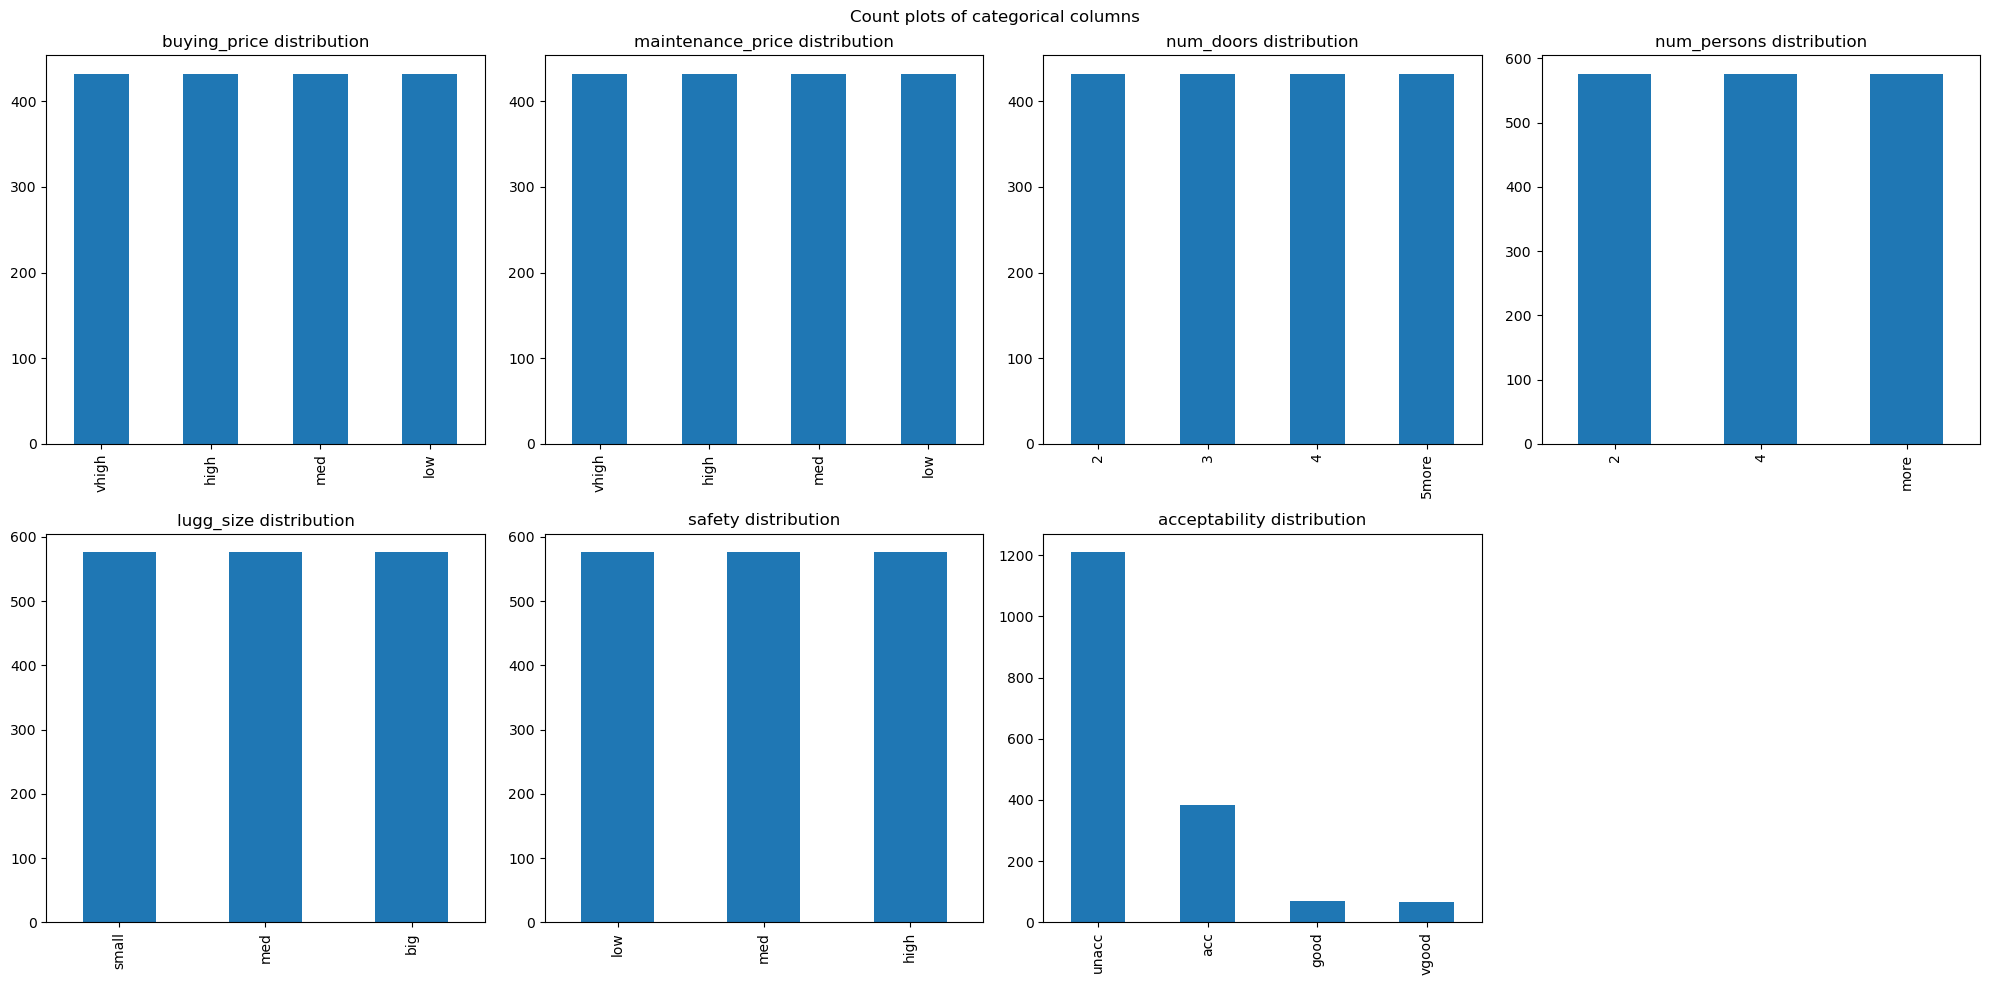

In [85]:
# Plot all the columns (all categorical) as subplots
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Count plots of categorical columns')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a subplot for each
for i, column in enumerate(df.columns):
    df[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{column} distribution')
    axes[i].set_xlabel('')

# Remove any empty subplots
for j in range(i + 1, 2 * 4):
    fig.delaxes(axes[j])

plt.tight_layout()

> Data is well distributed across categorical values

## **1.3 Data preperation**
We will need to One-Hot encode the categorical values to feed it as input for the model

In [86]:
# One hot encode the categorical columns
df = pd.get_dummies(df, columns=['buying_price', 'maintenance_price', 'num_doors', 'num_persons', 'lugg_size', 'safety'])

# One hot encode the target column
df['acceptability'] = df['acceptability'].map({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   acceptability            1728 non-null   int64
 1   buying_price_high        1728 non-null   bool 
 2   buying_price_low         1728 non-null   bool 
 3   buying_price_med         1728 non-null   bool 
 4   buying_price_vhigh       1728 non-null   bool 
 5   maintenance_price_high   1728 non-null   bool 
 6   maintenance_price_low    1728 non-null   bool 
 7   maintenance_price_med    1728 non-null   bool 
 8   maintenance_price_vhigh  1728 non-null   bool 
 9   num_doors_2              1728 non-null   bool 
 10  num_doors_3              1728 non-null   bool 
 11  num_doors_4              1728 non-null   bool 
 12  num_doors_5more          1728 non-null   bool 
 13  num_persons_2            1728 non-null   bool 
 14  num_persons_4            1728 non-null   bool 
 15  num_

## **2. Training the model**
<hr/>

### **2.1 Splitting train and test data (80%, 20%)**

In [87]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop('acceptability', axis=1)
y = df['acceptability'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1382, 21) (346, 21) (1382,) (346,)


### **2.2 Choosing model hyperparameters**
For this assignment i am required to use a neural network to classify. However, i need to pick the best hyperparameters to make the most optimized model as possible

**1. Network type**  
Because the dataset is not that large and this is a classification task, we can choose a ***fully connected neural network***.

**2. Network depth and width**  
The dataset is not that large with not a lot of features. Because the dataset is simple there is no need for a lot of layers. This is why i will pick a model with an ***input layer with 2 hidden layers and one output layer***  

As of the width i will choose for ***32 neurons per layer*** because the dataset can not contain a lot of relations or variations. If the model had more complex relations i would have picked 64 or 128 neurons per layer  

The input layer will of course have the neurons for the amount of input variables (in this case 21 due to one hot encoding). The output layer will have 4 neurons (one for each categorical value of the target acceptability)

**3. Activation functions**  
Without a activation function in each layer of the neural network, it would work the same as linear regression. It would just multiply the inputs by the weights and biases. An activation function introduces non-linearity which makes the model learn more complex patterns. ***ReLU*** is an example of an activation function which we will use that takes an input and if the input is negative (non useful information) it will pass on a 0, and it will allow positive numbers to pass.

When it comes to the output layer, we are expecting a categorical value (0,1,2,3). We use Softmax as an activation function here. Softmax gives the probabilities of each output and chooses the highest one

**4. Cost function**  
The standard cost function for multi class classification problems is ***Categorical Cross-Entropy***. It measures how well the predicted class probabilities match the true labels.

**5. Number of epochs**  
We start with ***50-100 epochs*** as the complexity of the neural network and the dataset are not that big. The model will train fast.

**6. Batch size**  
The batch size can be larger as the dataset is not too complex. but i will keep it at ***32***

**7. Learning rate**  
If the learning rate is too high, it will cause the model to miss the optimal weights and too low will slow down the training a lot. I will start with ***0.001***

**8. Dropout**  
I will use a dropout layer to prevent overfitting. It will randomly disable neurons during training (will be set to ***0.2*** to start)


### **2.3 Building the model**


In [88]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential



# Build the neural network model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 64 neurons, input shape based on features
model.add(Dropout(0.2))  # Dropout for regularization

# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Output layer with softmax for multi-class classification (4 classes)
model.add(Dense(4, activation='softmax'))

# Use adam optimizer with a learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',  # Multi-class classification loss (prediction)
              metrics=['accuracy'])

model.summary()

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_284 (Dense)           (None, 64)                1408      
                                                                 
 dropout_185 (Dropout)       (None, 64)                0         
                                                                 
 dense_285 (Dense)           (None, 64)                4160      
                                                                 
 dropout_186 (Dropout)       (None, 64)                0         
                                                                 
 dense_286 (Dense)           (None, 4)                 260       
                                                                 
Total params: 5,828
Trainable params: 5,828
Non-trainable params: 0
_________________________________________________________________


### **2.3 Training the model**

In [89]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop when validation loss stops improving
    patience=5,  # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best weights after stopping
)


# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
44/44 [==============================] - 1s 6ms/step - loss: 1.1796 - accuracy: 0.5094 - val_loss: 0.8292 - val_accuracy: 0.6792
Epoch 2/50
44/44 [==============================] - 0s 2ms/step - loss: 0.7221 - accuracy: 0.7236 - val_loss: 0.6181 - val_accuracy: 0.7254
Epoch 3/50
44/44 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7815 - val_loss: 0.4672 - val_accuracy: 0.8121
Epoch 4/50
44/44 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8343 - val_loss: 0.3868 - val_accuracy: 0.8266
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8437 - val_loss: 0.3200 - val_accuracy: 0.8642
Epoch 6/50
44/44 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8582 - val_loss: 0.2833 - val_accuracy: 0.8671
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8813 - val_loss: 0.2556 - val_accuracy: 0.8931
Epoch 8/50
44/44 [==

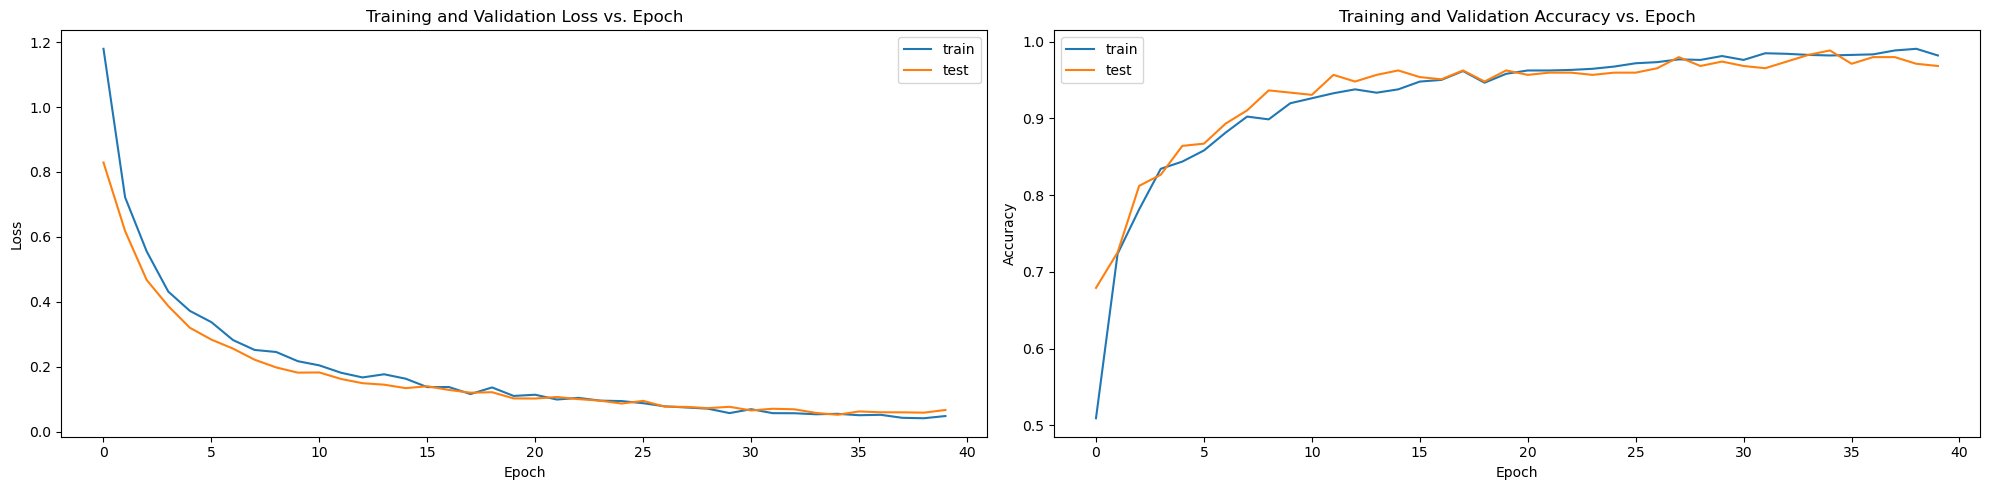

In [90]:
def plot_loss_and_accuracy_vs_epochs(training_history):
    # Create a subplots with training and validation loss and a confusion matrix
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

    # Plot the training and validation loss
    axes[0].plot(training_history.history['loss'], label='train')
    axes[0].plot(training_history.history['val_loss'], label='test')
    axes[0].set_title('Training and Validation Loss vs. Epoch')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plot the training and validation accuracy
    axes[1].plot(training_history.history['accuracy'], label='train')
    axes[1].plot(training_history.history['val_accuracy'], label='test')
    axes[1].set_title('Training and Validation Accuracy vs. Epoch')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()


    plt.tight_layout()
    plt.show()


plot_loss_and_accuracy_vs_epochs(history)

11/11 [==============================] - 0s 800us/step


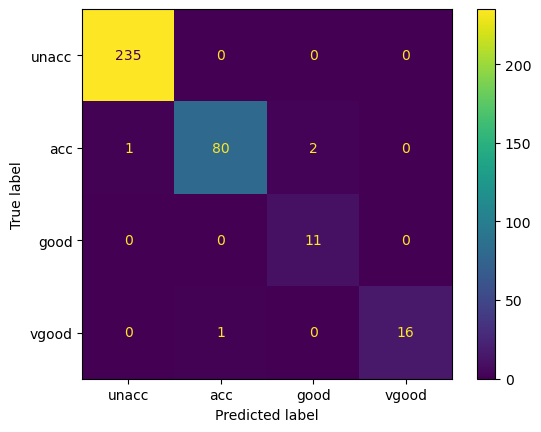

In [91]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

def plot_confusion_matrix(tested_model):
    # Predict the classes for the test set
    y_pred = tested_model.predict(X_test)
    y_pred = numpy.argmax(y_pred, axis=1)

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['unacc', 'acc', 'good', 'vgood'])
    cm_display.plot()
    plt.show()

plot_confusion_matrix(model)

## **3. Optimizing model hyperparameters**
Finding the best hyperparameters using optuna
<hr/>

In [92]:
import optuna
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split

# Define the objective function
def objective(trial):
    # Suggest hyperparameters
    n_layers = trial.suggest_int('n_layers', 1, 3)
    n_units = trial.suggest_int('n_units', 32, 128, step=32)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
    batch_size = trial.suggest_int('batch_size', 16, 128)
    epochs = trial.suggest_int('epochs', 10, 100, step=10)

    # Build the model
    model = Sequential()
    model.add(Dense(n_units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    for _ in range(n_layers - 1):
        model.add(Dense(n_units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(4, activation='softmax'))

    # Compile the model with optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5,  restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0, callbacks=[early_stopping])

    # Evaluate the model based on the validation accuracy
    val_accuracy = max(history.history['val_accuracy'])
    return val_accuracy

# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print the best hyperparameters
print('Best hyperparameters: ', study.best_params)

[I 2024-09-30 13:54:30,081] A new study created in memory with name: no-name-c6a6d9ab-c4b3-4000-b51c-2cab74c0bd6f
[I 2024-09-30 13:54:31,373] Trial 0 finished with value: 0.9826589822769165 and parameters: {'n_layers': 2, 'n_units': 64, 'learning_rate': 0.0354963194487242, 'dropout_rate': 0.30993936146154777, 'batch_size': 93, 'epochs': 20}. Best is trial 0 with value: 0.9826589822769165.
[I 2024-09-30 13:54:33,559] Trial 1 finished with value: 0.9971098303794861 and parameters: {'n_layers': 2, 'n_units': 32, 'learning_rate': 0.016168931467707936, 'dropout_rate': 0.2640717728216069, 'batch_size': 94, 'epochs': 70}. Best is trial 1 with value: 0.9971098303794861.
[I 2024-09-30 13:54:34,844] Trial 2 finished with value: 0.5433526039123535 and parameters: {'n_layers': 2, 'n_units': 32, 'learning_rate': 2.0962257276893685e-05, 'dropout_rate': 0.09614793092549428, 'batch_size': 109, 'epochs': 10}. Best is trial 1 with value: 0.9971098303794861.
[I 2024-09-30 13:54:38,450] Trial 3 finished w

Best hyperparameters:  {'n_layers': 2, 'n_units': 32, 'learning_rate': 0.016168931467707936, 'dropout_rate': 0.2640717728216069, 'batch_size': 94, 'epochs': 70}


In [93]:
# Create a model with the best hyperparameters
best_model = Sequential()

# Add the input layer
best_model.add(Dense(study.best_params['n_units'], input_dim=X_train.shape[1], activation='relu'))

# Add the hidden layers
for _ in range(study.best_params['n_layers'] - 1):
    best_model.add(Dense(study.best_params['n_units'], activation='relu'))
    best_model.add(Dropout(study.best_params['dropout_rate']))

# Add the output layer
best_model.add(Dense(4, activation='softmax'))

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=study.best_params['learning_rate'])
best_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
best_history = best_model.fit(X_train, y_train, epochs=study.best_params['epochs'], batch_size=study.best_params['batch_size'], validation_data=(X_test, y_test))

Epoch 1/70
15/15 [==============================] - 1s 16ms/step - loss: 0.8271 - accuracy: 0.6679 - val_loss: 0.5409 - val_accuracy: 0.6821
Epoch 2/70
15/15 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.7894 - val_loss: 0.3455 - val_accuracy: 0.8757
Epoch 3/70
15/15 [==============================] - 0s 3ms/step - loss: 0.2933 - accuracy: 0.8734 - val_loss: 0.2594 - val_accuracy: 0.8931
Epoch 4/70
15/15 [==============================] - 0s 3ms/step - loss: 0.2282 - accuracy: 0.8900 - val_loss: 0.2116 - val_accuracy: 0.8931
Epoch 5/70
15/15 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9059 - val_loss: 0.2326 - val_accuracy: 0.8960
Epoch 6/70
15/15 [==============================] - 0s 3ms/step - loss: 0.1842 - accuracy: 0.9378 - val_loss: 0.1713 - val_accuracy: 0.9277
Epoch 7/70
15/15 [==============================] - 0s 3ms/step - loss: 0.1182 - accuracy: 0.9595 - val_loss: 0.0975 - val_accuracy: 0.9653
Epoch 8/70
15/15 [=

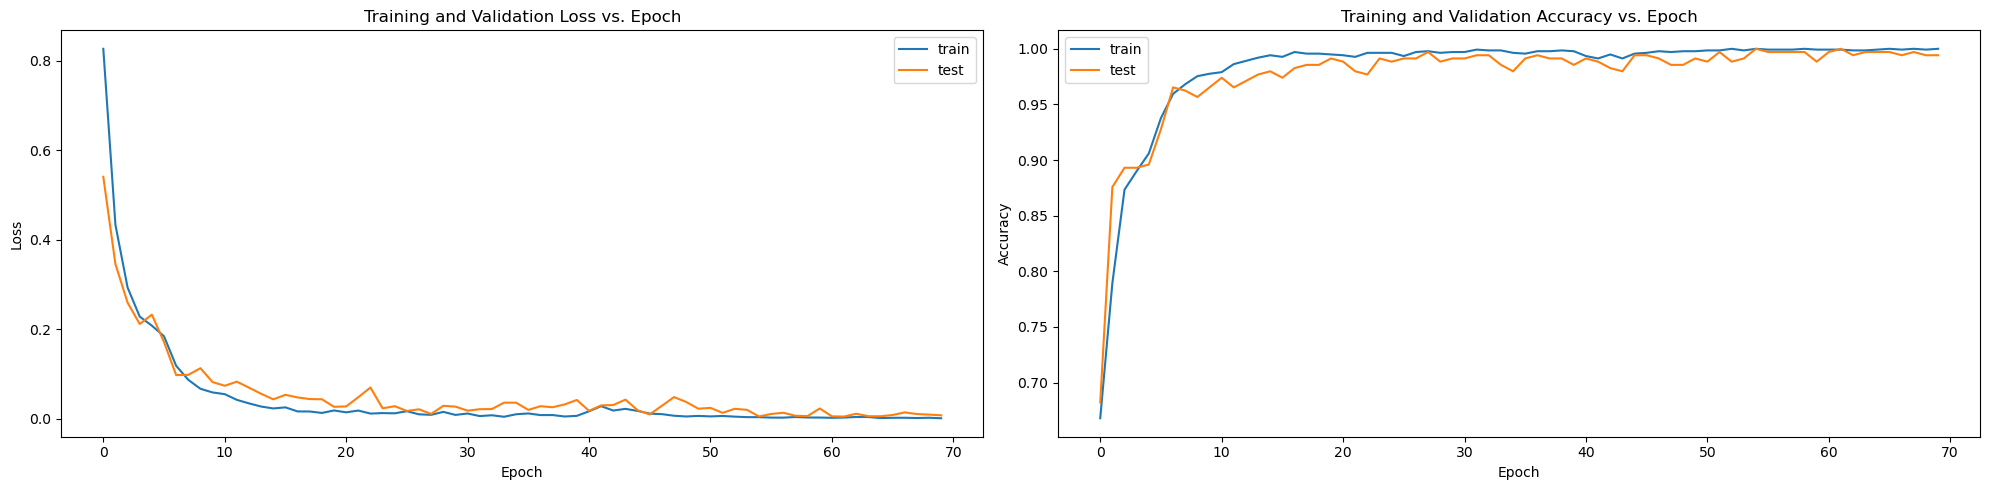

In [94]:
plot_loss_and_accuracy_vs_epochs(best_history)

11/11 [==============================] - 0s 700us/step


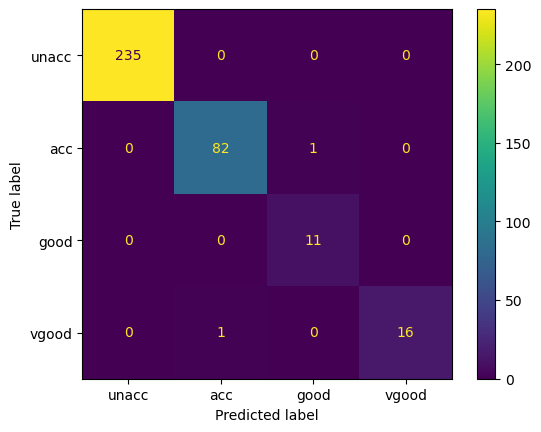

In [95]:
plot_confusion_matrix(best_model)